In [3]:
import pandas as pd
import numpy as np

## Importing the data

In [4]:
data_path = '../data/raw/chordonomicon.csv'

In [5]:
df = pd.read_csv(data_path)

/var/folders/ln/8s8rnz7s3pv6jwy7khy_32yw0000gn/T/ipykernel_37345/606058143.py:1: DtypeWarning: Columns (2,3,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


In [6]:
df.head()

,id,chords,release_date,genres,decade,rock_genre,artist_id,main_genre,spotify_song_id,spotify_artist_id
0,1,<intro_1> C <verse_1> F C E7 Amin C F C G7 C F...,NaN,'classic country pop',NaN,NaN,artist_1,pop,NaN,4AIEGdwDzPELXYgM5JaEY5
1,2,<intro_1> E D A/Cs E D A/Cs <verse_1> E D A/Cs...,2003-01-01,'alternative metal' 'alternative rock' 'nu met...,2000.0,pop rock,artist_2,metal,2ffJZ2r8HxI5DHcmf3BO6c,694QW15WkebjcrWgQHzRYF
2,3,<intro_1> Csmin <verse_1> A Csmin A Csmin A Cs...,2003-01-01,'alternative metal' 'canadian rock' 'funk meta...,2000.0,canadian rock,artist_3,metal,5KiY8SZEnvCPyIEkFGRR3y,0niJkG4tKkne3zwr7I8n9n
3,4,<intro_1> D Dmaj7 D Dmaj7 <verse_1> Emin A D G...,2022-09-23,NaN,2020.0,NaN,artist_4,NaN,01TtAcUqyLCRBZq4ZZiQWS,17BfKBemmMGO5ZAK25wraW
4,5,<intro_1> C <verse_1> G C G C <chorus_1> F Dmi...,2023-02-10,'modern country pop',2020.0,NaN,artist_5,pop,3zUecdrWC3IqrNSjhnoF3G,4GGfAshSkqoxpZdoaHm7ky


In [7]:
df.shape

(679807, 10)

In [8]:
df.columns

Index(['id', 'chords', 'release_date', 'genres', 'decade', 'rock_genre',
       'artist_id', 'main_genre', 'spotify_song_id', 'spotify_artist_id'],
      dtype='object')

In [9]:
for col in df.columns:
    print(f"{col}: {df[col].apply(type).value_counts()}")

id: id
<class 'int'>    679807
Name: count, dtype: int64
chords: chords
<class 'str'>    679807
Name: count, dtype: int64
release_date: release_date
<class 'str'>      422181
<class 'float'>    257626
Name: count, dtype: int64
genres: genres
<class 'str'>      429753
<class 'float'>    250054
Name: count, dtype: int64
decade: decade
<class 'float'>    679807
Name: count, dtype: int64
rock_genre: rock_genre
<class 'float'>    534589
<class 'str'>      145218
Name: count, dtype: int64
artist_id: artist_id
<class 'str'>      510986
<class 'float'>    168821
Name: count, dtype: int64
main_genre: main_genre
<class 'str'>      352111
<class 'float'>    327696
Name: count, dtype: int64
spotify_song_id: spotify_song_id
<class 'str'>      440284
<class 'float'>    239523
Name: count, dtype: int64
spotify_artist_id: spotify_artist_id
<class 'str'>      510986
<class 'float'>    168821
Name: count, dtype: int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679807 entries, 0 to 679806
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 679807 non-null  int64  
 1   chords             679807 non-null  object 
 2   release_date       422181 non-null  object 
 3   genres             429753 non-null  object 
 4   decade             422181 non-null  float64
 5   rock_genre         145218 non-null  object 
 6   artist_id          510986 non-null  object 
 7   main_genre         352111 non-null  object 
 8   spotify_song_id    440284 non-null  object 
 9   spotify_artist_id  510986 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 51.9+ MB


## Looking for `missing` data

In [11]:
import missingno as mno

In [12]:
missing_values = df.isnull().sum()
print(f'Missing values in each column:\n{missing_values}')

Missing values in each column:
id                        0
chords                    0
release_date         257626
genres               250054
decade               257626
rock_genre           534589
artist_id            168821
main_genre           327696
spotify_song_id      239523
spotify_artist_id    168821
dtype: int64


In [13]:
missing_values_percentage = missing_values / len(df) * 100
missing_values_percentage

id                    0.000000
chords                0.000000
release_date         37.896933
genres               36.783087
decade               37.896933
rock_genre           78.638349
artist_id            24.833666
main_genre           48.204270
spotify_song_id      35.233971
spotify_artist_id    24.833666
dtype: float64

In [26]:
import matplotlib.pyplot as plt

<Axes: >

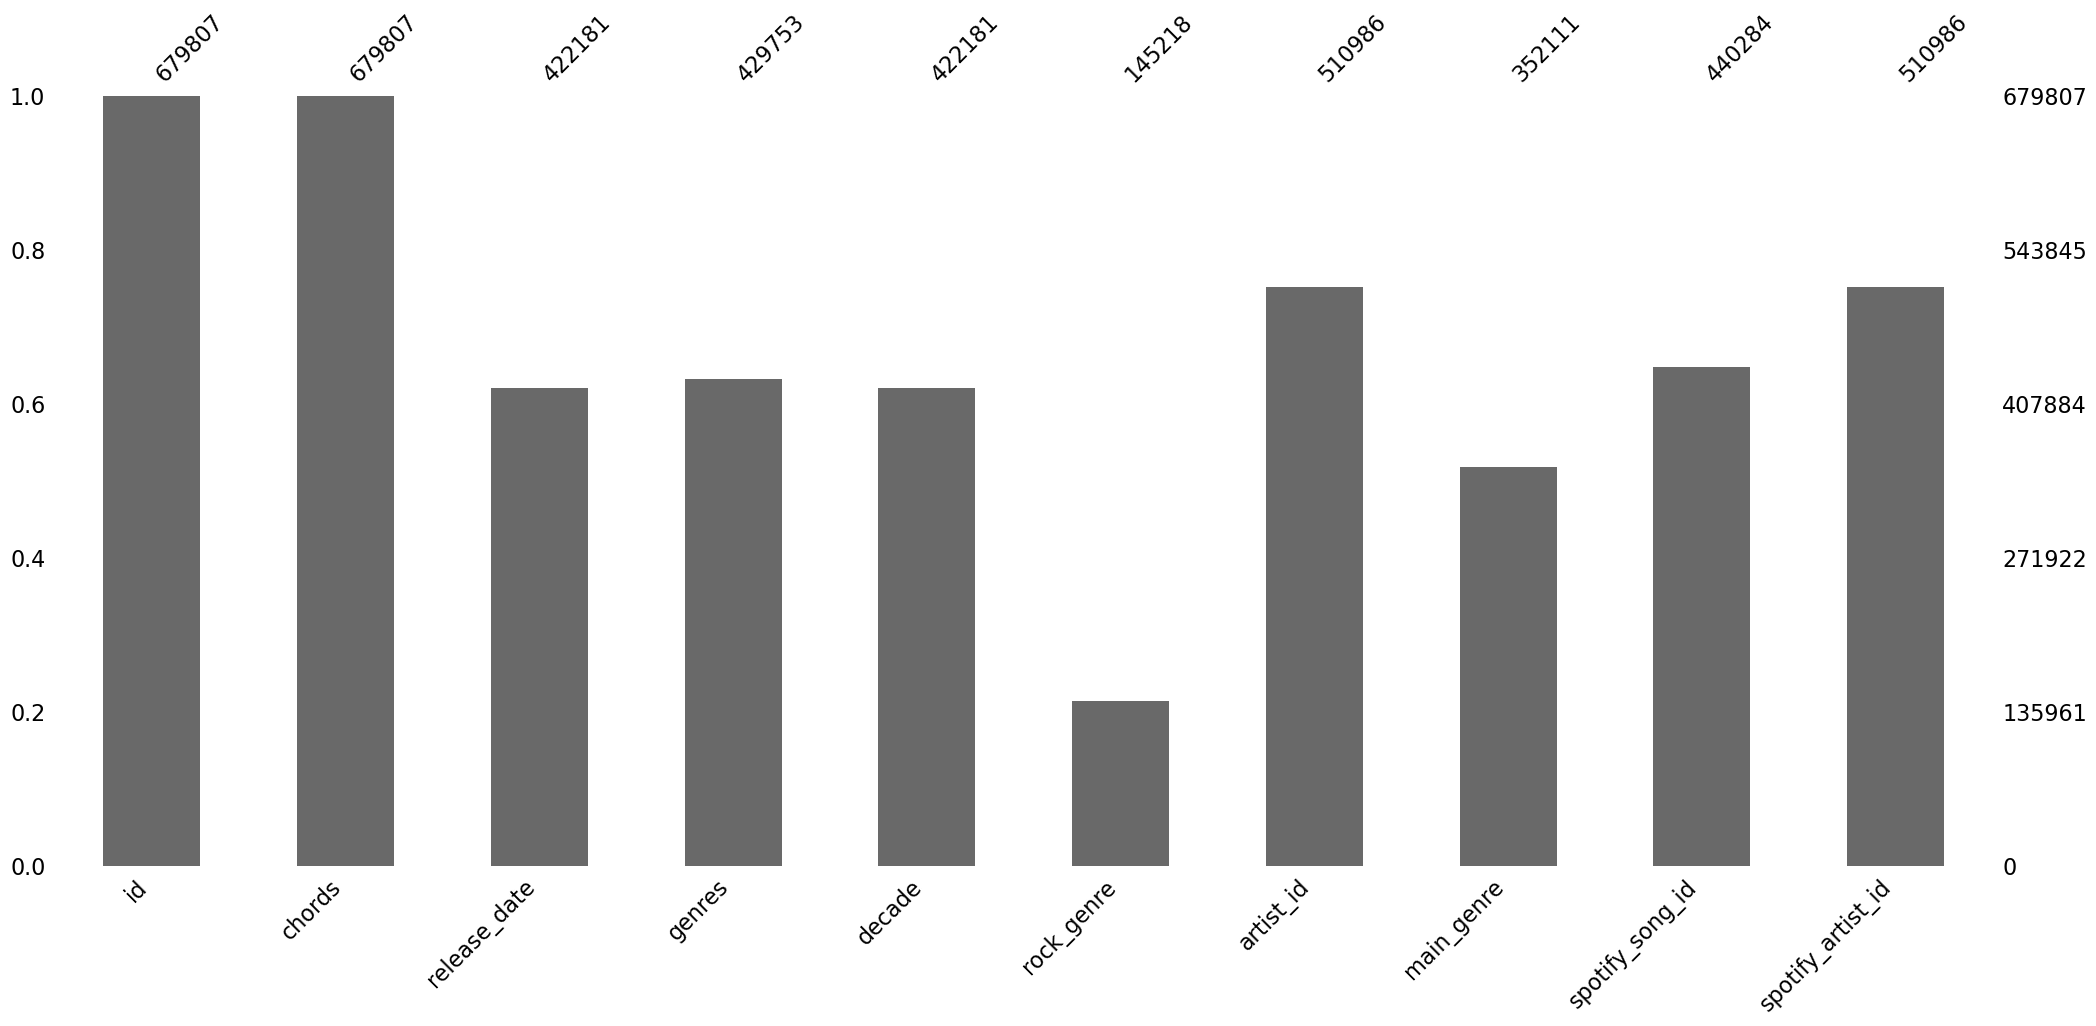

In [30]:
mno.bar(df)

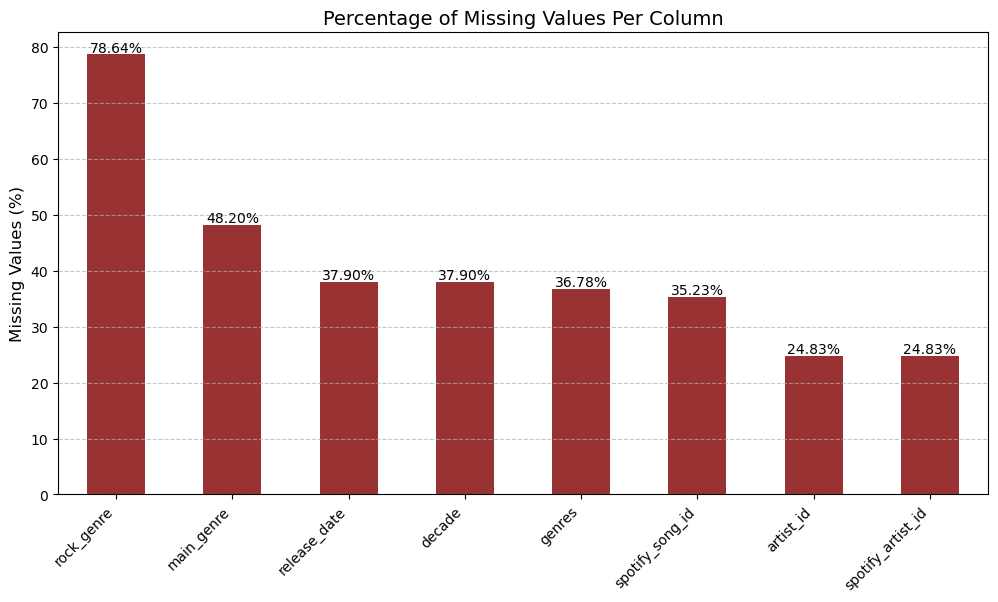

In [24]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Filter out columns with no missing values
missing_percentage = missing_percentage[missing_percentage > 0]

plt.figure(figsize=(12, 6))
missing_percentage.sort_values(ascending=False).plot(kind="bar", color="maroon", alpha=0.8)

plt.title("Percentage of Missing Values Per Column", fontsize=14)
plt.ylabel("Missing Values (%)", fontsize=12)
plt.xticks(rotation=45, ha="right")  # Rotate labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show values on top of bars
for index, value in enumerate(missing_percentage.sort_values(ascending=False)):
    plt.text(index, value + 0.5, f"{value:.2f}%", ha="center", fontsize=10)

plt.show()